# First Project

In [1]:
from pymonntorch import *
import torch

import matplotlib.pyplot as plt

from currents import ConstantCurrent, StepCurrent, SinCurrent, RampCurrent, LogCurrent, NoisyCurrent, RefractoryPeriod
from models import LIF, ELIF,AELIF
from time_res import TimeResolution
from plots import plot_membrane_potential
from simulate import SimulateNeuronGroup, Simulation

# 1.1 LIF

## 1.1.1 LIF model with Constant Current

In [2]:
net1 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.1)}))
net1.add_neuron_group(tag="lif_const_curr",
                                size=1,
                                behavior={
                                    2: ConstantCurrent(value=10),
                                    3: LIF(R=5,
                                           tau=10,
                                           threshold=-37,
                                           u_rest=-67,
                                           u_reset=-75,
                                           ),
                                    4: Recorder(variables=["u", "I"], tag="ng_const_rec"),
                                    5: EventRecorder(variables=['spike'], tag="ng_const_event")
                                    })
net1.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.1,)}
NeuronGroup['lif_const_curr', 'SimulateNeuronGroup', 'ng'](1){2:ConstantCurrent(value=10,)3:LIF(R=5,tau=10,threshold=-37,u_rest=-67,u_reset=-75,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_event,)}
1000xBatch: 1/1 (100%) 420.928ms


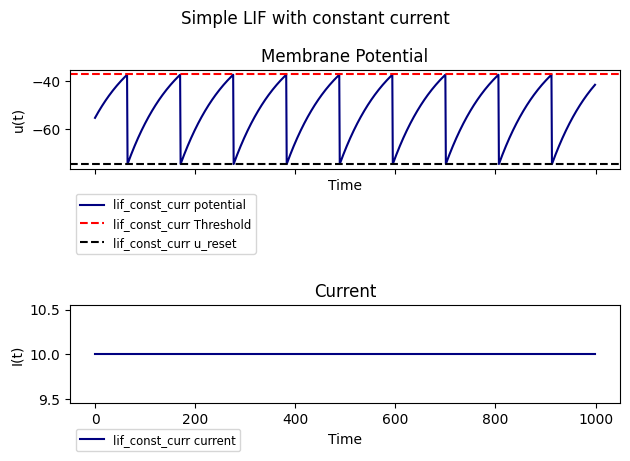

In [3]:
net1.plot_membrane_potential(title="Simple LIF with constant current", save=True)

## 1.1.2 LIF model with Step Current


In [4]:
net2 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.1)}))
net2.add_neuron_group(tag="lif_step_curr",
                      size=1,
                      behavior={
                            2: StepCurrent(value=10,
                                                   t_start=25,
                                                   t_end=75),
                            3: LIF(R=5,
                                   tau=10,
                                   threshold=-37,
                                   u_rest=-67,
                                   u_reset=-75,
                                   ),
                            4: Recorder(variables=["u", "I"], tag="ng_step_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_step_event")
                        }
                      )
net2.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.1,)}
NeuronGroup['lif_step_curr', 'SimulateNeuronGroup', 'ng'](1){2:StepCurrent(value=10,t_start=25,t_end=75,)3:LIF(R=5,tau=10,threshold=-37,u_rest=-67,u_reset=-75,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_step_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_step_event,)}
1000xBatch: 1/1 (100%) 388.675ms


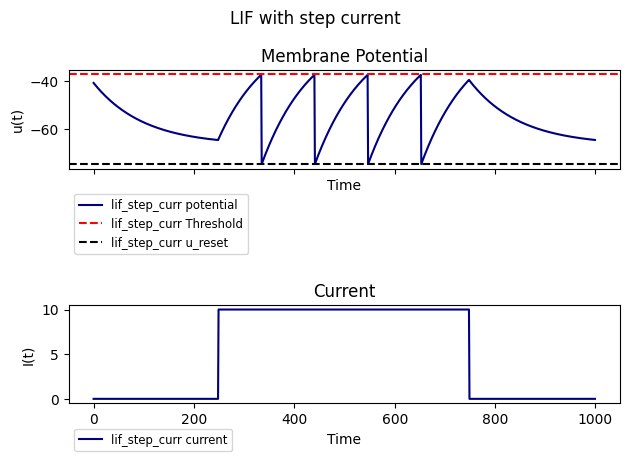

In [5]:
net2.plot_membrane_potential(title="LIF with step current")

## 1.1.3 LIF model with Sin Current

In [6]:
net3 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.1)}))
net3.add_neuron_group(tag="lif_sin_curr",
                        size=1,
                        behavior={
                            2: SinCurrent(amplitude=20,
                                          frequency=2,
                                          phase=2.0,
                                          offset=10),
                            3: LIF(R=5,
                                   tau=10,
                                   threshold=-37,
                                   u_rest=-67,
                                   u_reset=-75,
                                   ),
                            4: Recorder(variables=["u", "I"], tag="ng_sin_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_sin_event")
                        }
                      )
net3.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.1,)}
NeuronGroup['lif_sin_curr', 'SimulateNeuronGroup', 'ng'](1){2:SinCurrent(amplitude=20,frequency=2,phase=2.0,offset=10,)3:LIF(R=5,tau=10,threshold=-37,u_rest=-67,u_reset=-75,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_sin_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_sin_event,)}
1000xBatch: 1/1 (100%) 451.140ms


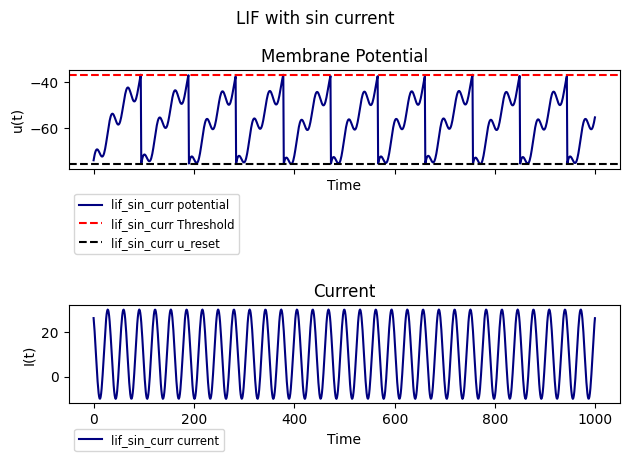

In [7]:
net3.plot_membrane_potential(title="LIF with sin current")

## 1.1.4 LIF model with Ramp Current

In [8]:
net4 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.1)}))
net4.add_neuron_group(tag="lif_ramp_curr",
                        size=1,
                        behavior={
                            2: RampCurrent(slope=1.2),
                            3: LIF(R=5,
                                   tau=10,
                                   threshold=-37,
                                   u_rest=-67,
                                   u_reset=-75,
                                   ),
                            4: Recorder(variables=["u", "I"], tag="ng_ramp_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_ramp_event")
                        }
                      )
net4.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.1,)}
NeuronGroup['lif_ramp_curr', 'SimulateNeuronGroup', 'ng'](1){2:RampCurrent(slope=1.2,)3:LIF(R=5,tau=10,threshold=-37,u_rest=-67,u_reset=-75,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_ramp_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_ramp_event,)}
1000xBatch: 1/1 (100%) 378.864ms


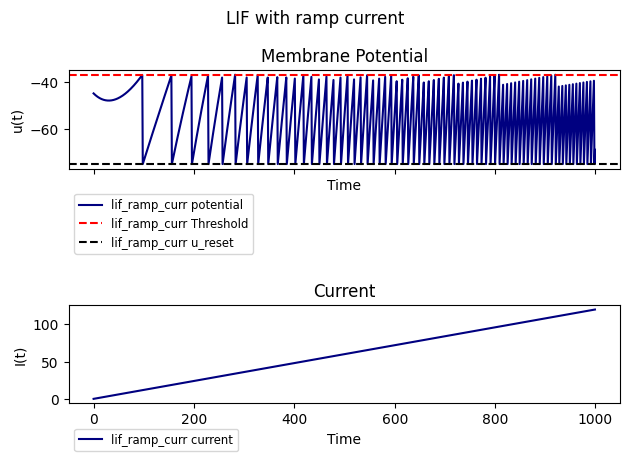

In [9]:
net4.plot_membrane_potential(title="LIF with ramp current")

## 1.1.5 LIF model with log current

In [10]:
net5 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.1)}))
net5.add_neuron_group(tag="lif_log_curr",
                        size=1,
                        behavior={
                        2: LogCurrent(vertical_shift=4),
                        3: LIF(R=5,
                               tau=10,
                               threshold=-37,
                               u_rest=-67,
                               u_reset=-75,
                               ),
                        4: Recorder(variables=["u", "I"], tag="ng_log_rec"),
                        5: EventRecorder(variables=['spike'], tag="ng_log_event")
                    }
                      )
net5.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.1,)}
NeuronGroup['lif_log_curr', 'SimulateNeuronGroup', 'ng'](1){2:LogCurrent(vertical_shift=4,)3:LIF(R=5,tau=10,threshold=-37,u_rest=-67,u_reset=-75,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_log_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_log_event,)}
1000xBatch: 1/1 (100%) 460.276ms


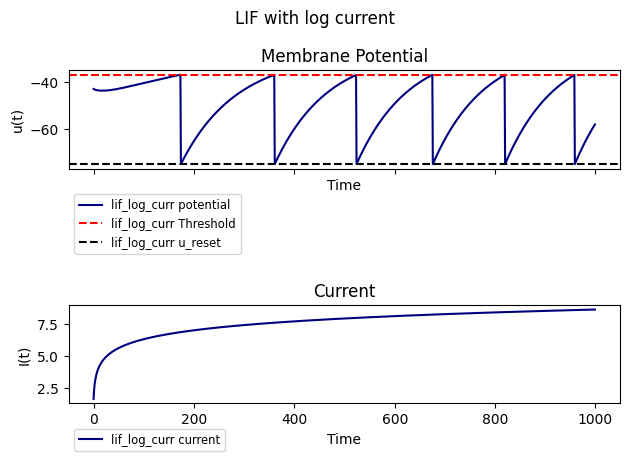

In [11]:
net5.plot_membrane_potential(title="LIF with log current")

# 1.2 ELIF model

## 1.2.1 ELIF model with constant current

In [12]:
net1 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.5)}))
net1.add_neuron_group(tag="elif_const_curr",
                        size=1,
                        behavior={
                            2: ConstantCurrent(value=13.8),
                            3: ELIF(R=1.7,
                                    tau=10,
                                    threshold=-13,
                                    rh_threshold=-42,
                                    u_rest=-65,
                                    u_reset=-73,
                                    delta_T=0.1
                                    ),
                            4: Recorder(variables=["u", "I"], tag="ng_const_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_const_event")
                        }
                      )
net1.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.5,)}
NeuronGroup['elif_const_curr', 'SimulateNeuronGroup', 'ng'](1){2:ConstantCurrent(value=13.8,)3:ELIF(R=1.7,tau=10,threshold=-13,rh_threshold=-42,u_rest=-65,u_reset=-73,delta_T=0.1,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_event,)}
1000xBatch: 1/1 (100%) 393.149ms


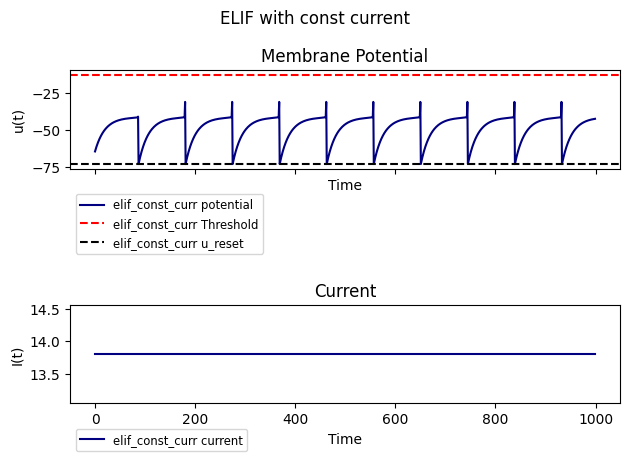

In [13]:
net1.plot_membrane_potential(title="ELIF with const current")

## 1.2.2 ELIF model with step current


In [14]:
net2 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.5)}))
net2.add_neuron_group(tag="elif_step_curr",
                        size=1,
                        behavior={
                            2: StepCurrent(value=13.8,
                                                   t_start=50,
                                                   t_end=250),
                            3: ELIF(R=1.7,
                                    tau=10,
                                    threshold=-13,
                                    rh_threshold=-42,
                                    u_rest=-65,
                                    u_reset=-73,
                                    delta_T=0.1
                                    ),
                            4: Recorder(variables=["u", "I"], tag="ng_step_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_step_event")
                        }
                      )
net2.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.5,)}
NeuronGroup['elif_step_curr', 'SimulateNeuronGroup', 'ng'](1){2:StepCurrent(value=13.8,t_start=50,t_end=250,)3:ELIF(R=1.7,tau=10,threshold=-13,rh_threshold=-42,u_rest=-65,u_reset=-73,delta_T=0.1,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_step_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_step_event,)}
1000xBatch: 1/1 (100%) 407.590ms


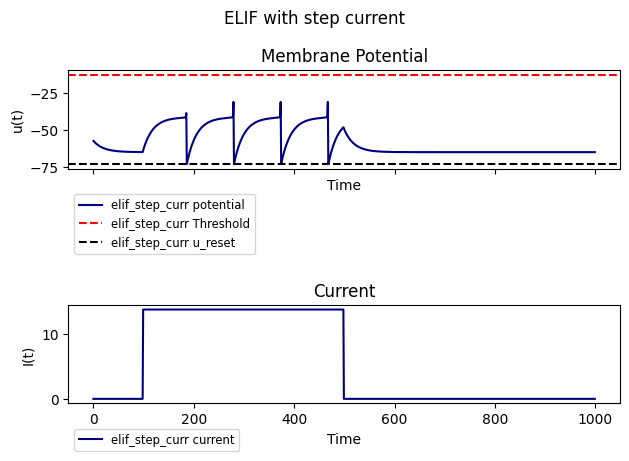

In [15]:
net2.plot_membrane_potential(title="ELIF with step current")

## 1.2.3 ELIF model with sin current

In [16]:
net3 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.1)}))
net3.add_neuron_group(tag="elif_sin_curr",
                        size=1,
                        behavior={
                            2: SinCurrent(amplitude=10,
                                          frequency=1,
                                          phase=0,
                                          offset=20),
                            3: ELIF(R=1.7,
                                    tau=10,
                                    threshold=-13,
                                    rh_threshold=-42,
                                    u_rest=-65,
                                    u_reset=-73,
                                    delta_T=0.1
                                    ),
                            4: Recorder(variables=["u", "I"], tag="ng_sin_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_sin_event")
                        }
                      )
net3.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.1,)}
NeuronGroup['elif_sin_curr', 'SimulateNeuronGroup', 'ng'](1){2:SinCurrent(amplitude=10,frequency=1,phase=0,offset=20,)3:ELIF(R=1.7,tau=10,threshold=-13,rh_threshold=-42,u_rest=-65,u_reset=-73,delta_T=0.1,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_sin_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_sin_event,)}
1000xBatch: 1/1 (100%) 479.906ms


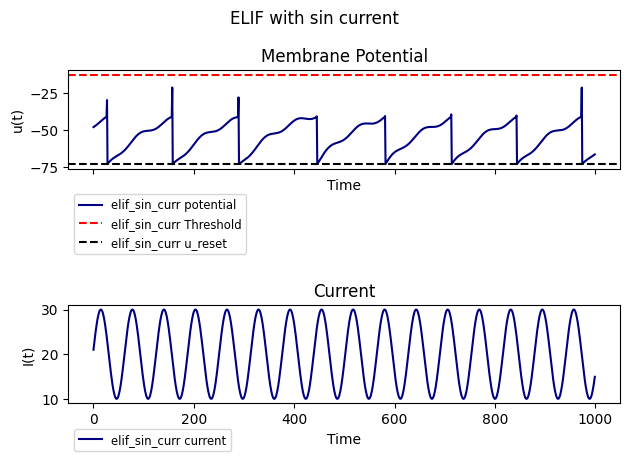

In [17]:
net3.plot_membrane_potential(title="ELIF with sin current")

## 1.2.4 ELIF model with ramp current

In [18]:
net4 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.1)}))
net4.add_neuron_group(tag="elif_ramp_curr",
                        size=1,
                        behavior={
                            2: RampCurrent(slope=3),
                            3: ELIF(R=1.7,
                                    tau=10,
                                    threshold=-13,
                                    rh_threshold=-42,
                                    u_rest=-65,
                                    u_reset=-73,
                                    delta_T=0.1
                                    ),
                            4: Recorder(variables=["u", "I"], tag="ng_ramp_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_ramp_event")
                        }
                      )
net4.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.1,)}
NeuronGroup['elif_ramp_curr', 'SimulateNeuronGroup', 'ng'](1){2:RampCurrent(slope=3,)3:ELIF(R=1.7,tau=10,threshold=-13,rh_threshold=-42,u_rest=-65,u_reset=-73,delta_T=0.1,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_ramp_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_ramp_event,)}
1000xBatch: 1/1 (100%) 378.360ms


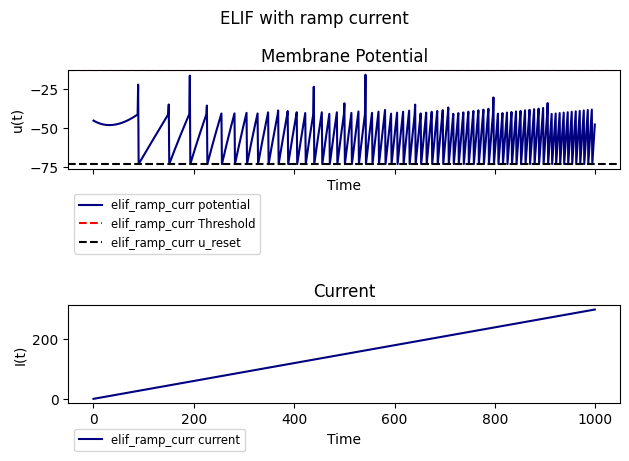

In [19]:
net4.plot_membrane_potential(title="ELIF with ramp current")

## 1.2.5 ELIF model with log current

In [20]:
net5 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.2)}))
net5.add_neuron_group(tag="elif_log_curr",
                        size=1,
                        behavior={
                            2: LogCurrent(vertical_shift=10),
                            3: ELIF(R=1.7,
                                    tau=10,
                                    threshold=-13,
                                    rh_threshold=-42,
                                    u_rest=-65,
                                    u_reset=-73,
                                    delta_T=0.1
                                    ),
                            4: Recorder(variables=["u", "I"], tag="ng_log_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_log_event")
                        }
                      )
net5.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.2,)}
NeuronGroup['elif_log_curr', 'SimulateNeuronGroup', 'ng'](1){2:LogCurrent(vertical_shift=10,)3:ELIF(R=1.7,tau=10,threshold=-13,rh_threshold=-42,u_rest=-65,u_reset=-73,delta_T=0.1,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_log_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_log_event,)}
1000xBatch: 1/1 (100%) 463.487ms


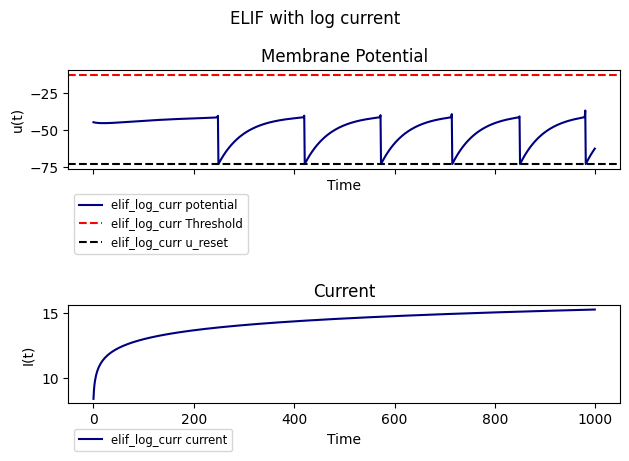

In [21]:
net5.plot_membrane_potential(title="ELIF with log current")

# 1.3 AELIF model

## 1.3.1 AELIF model with constant current

In [22]:
net1 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.5)}))
net1.add_neuron_group(tag="aelif_const_curr",
                        size=1,
                        behavior={
                            2: ConstantCurrent(value=30),
                            3: AELIF(a=6.7,
                                     b=0.01,
                                     R=1.7,
                                     tau_m=10,
                                     tau_w=100,
                                     threshold=-30,
                                     rh_threshold=-50,
                                     u_rest=-65,
                                     u_reset=-70,
                                     delta_T=1
                                     ),
                            4: Recorder(variables=["u", "I", "w"], tag="ng_const_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_const_event")
                        }
                      )
net1.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.5,)}
NeuronGroup['aelif_const_curr', 'SimulateNeuronGroup', 'ng'](1){2:ConstantCurrent(value=30,)3:AELIF(a=6.7,b=0.01,R=1.7,tau_m=10,tau_w=100,threshold=-30,rh_threshold=-50,u_rest=-65,u_reset=-70,delta_T=1,)4:Recorder(variables=['u', 'I', 'w'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_event,)}
1000xBatch: 1/1 (100%) 506.382ms


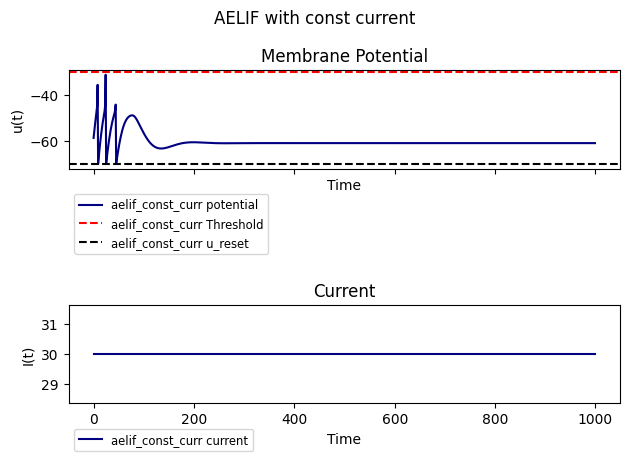

In [23]:
net1.plot_membrane_potential(title="AELIF with const current")

## 1.3.2 AELIF model with step current

In [24]:
net2 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.5)}))
net2.add_neuron_group(tag="aelif_step_curr",
                        size=1,
                        behavior={
                            2: StepCurrent(value=30,
                                                   t_start=50),
                            3: AELIF(a=6.7,
                                     b=0.01,
                                     R=1.7,
                                     tau_m=10,
                                     tau_w=100,
                                     threshold=-30,
                                     rh_threshold=-50,
                                     u_rest=-65,
                                     u_reset=-70,
                                     delta_T=1
                                     ),
                            4: Recorder(variables=["u", "I", "w"], tag="ng_step_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_step_event")
                        }
                      )
net2.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.5,)}
NeuronGroup['aelif_step_curr', 'SimulateNeuronGroup', 'ng'](1){2:StepCurrent(value=30,t_start=50,)3:AELIF(a=6.7,b=0.01,R=1.7,tau_m=10,tau_w=100,threshold=-30,rh_threshold=-50,u_rest=-65,u_reset=-70,delta_T=1,)4:Recorder(variables=['u', 'I', 'w'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_step_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_step_event,)}
1000xBatch: 1/1 (100%) 505.933ms


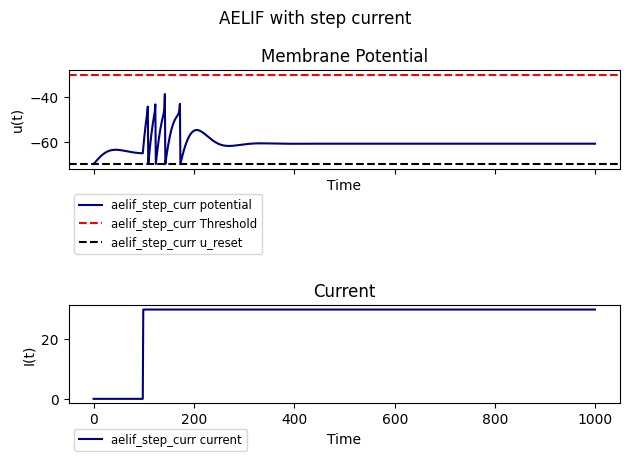

In [25]:
net2.plot_membrane_potential(title="AELIF with step current")

## 1.3.3 AELIF model with sin current

In [26]:
net3 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.2)}))
net3.add_neuron_group(tag="aelif_sin_curr",
                        size=1,
                        behavior={
                            2: SinCurrent(amplitude=10,
                                          frequency=1,
                                          phase=0,
                                          offset=20),
                            3: AELIF(a=0.5,
                                     b=7,
                                     R=1.7,
                                     tau_m=10,
                                     tau_w=100,
                                     threshold=-13,
                                     rh_threshold=-42,
                                     u_rest=-65,
                                     u_reset=-73,
                                     delta_T=0.1
                                     ),
                            4: Recorder(variables=["u", "I", "w"], tag="ng_sin_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_sin_event")
                        }
                      )
net3.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.2,)}
NeuronGroup['aelif_sin_curr', 'SimulateNeuronGroup', 'ng'](1){2:SinCurrent(amplitude=10,frequency=1,phase=0,offset=20,)3:AELIF(a=0.5,b=7,R=1.7,tau_m=10,tau_w=100,threshold=-13,rh_threshold=-42,u_rest=-65,u_reset=-73,delta_T=0.1,)4:Recorder(variables=['u', 'I', 'w'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_sin_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_sin_event,)}
1000xBatch: 1/1 (100%) 608.880ms


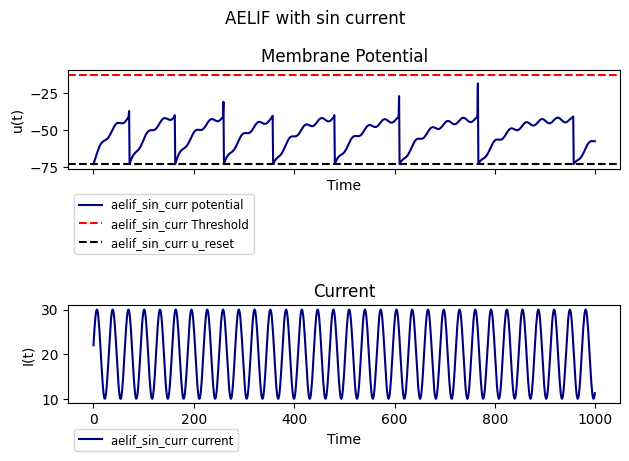

In [27]:
net3.plot_membrane_potential(title="AELIF with sin current")

## 1.3.4 AELIF model with ramp current

In [28]:
net4 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.1)}))
net4.add_neuron_group(tag="aelif_ramp_curr",
                        size=1,
                        behavior={
                            2: RampCurrent(slope=3),
                            3: AELIF(a=0.5,
                                     b=7,
                                     R=1.7,
                                     tau_m=10,
                                     tau_w=100,
                                     threshold=-13,
                                     rh_threshold=-42,
                                     u_rest=-65,
                                     u_reset=-73,
                                     delta_T=0.1
                                     ),
                            4: Recorder(variables=["u", "I", "w"], tag="ng_ramp_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_ramp_event")
                        }
                      )
net4.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.1,)}
NeuronGroup['aelif_ramp_curr', 'SimulateNeuronGroup', 'ng'](1){2:RampCurrent(slope=3,)3:AELIF(a=0.5,b=7,R=1.7,tau_m=10,tau_w=100,threshold=-13,rh_threshold=-42,u_rest=-65,u_reset=-73,delta_T=0.1,)4:Recorder(variables=['u', 'I', 'w'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_ramp_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_ramp_event,)}
1000xBatch: 1/1 (100%) 493.957ms


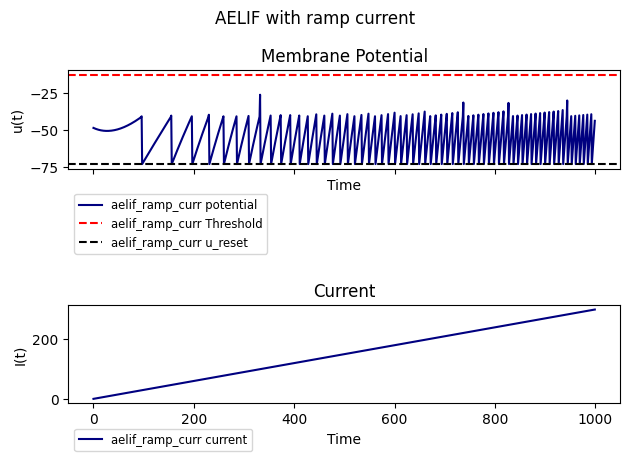

In [29]:
net4.plot_membrane_potential(title="AELIF with ramp current")

## 1.3.5 AELIF model with log current

In [30]:
net5 = Simulation(net=Network(behavior={1: TimeResolution(dt=1)}))
net5.add_neuron_group(tag="aelif_log_curr",
                        size=1,
                        behavior={
                            2: LogCurrent(vertical_shift=20),
                            3: AELIF(a=0.5,
                                     b=7,
                                     R=1.7,
                                     tau_m=10,
                                     tau_w=100,
                                     threshold=-13,
                                     rh_threshold=-42,
                                     u_rest=-65,
                                     u_reset=-73,
                                     delta_T=0.1
                                     ),
                            4: Recorder(variables=["u", "I", "w"], tag="ng_log_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_log_event")
                        }
                      )
net5.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1,)}
NeuronGroup['aelif_log_curr', 'SimulateNeuronGroup', 'ng'](1){2:LogCurrent(vertical_shift=20,)3:AELIF(a=0.5,b=7,R=1.7,tau_m=10,tau_w=100,threshold=-13,rh_threshold=-42,u_rest=-65,u_reset=-73,delta_T=0.1,)4:Recorder(variables=['u', 'I', 'w'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_log_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_log_event,)}
1000xBatch: 1/1 (100%) 575.670ms


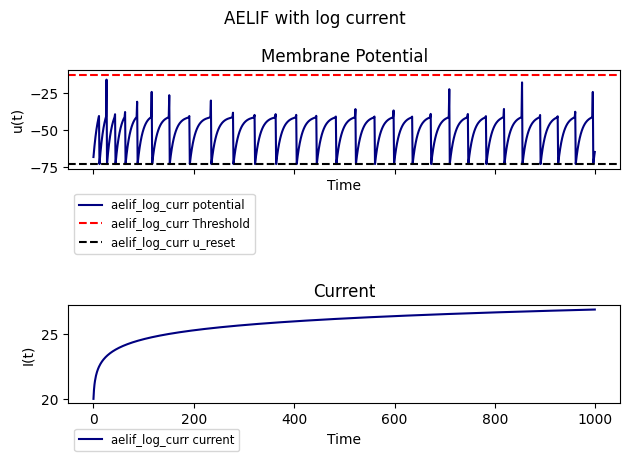

In [31]:
net5.plot_membrane_potential(title="AELIF with log current")

# 2- Noise

# 2.1 LIF models with noise

## 2.1.1 LIF model with constant current and noise

In [32]:
net1 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.1)}))
net1.add_neuron_group(tag="lif_const_curr",
                                size=1,
                                behavior={
                                    2: ConstantCurrent(value=10,
                                                       noise_range=3),
                                    3: LIF(R=5,
                                           tau=10,
                                           threshold=-37,
                                           u_rest=-67,
                                           u_reset=-75,
                                           ),
                                    4: Recorder(variables=["u", "I"], tag="ng_const_rec"),
                                    5: EventRecorder(variables=['spike'], tag="ng_const_event")
                                    })
net1.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.1,)}
NeuronGroup['lif_const_curr', 'SimulateNeuronGroup', 'ng'](1){2:ConstantCurrent(value=10,noise_range=3,)3:LIF(R=5,tau=10,threshold=-37,u_rest=-67,u_reset=-75,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_event,)}
1000xBatch: 1/1 (100%) 359.071ms


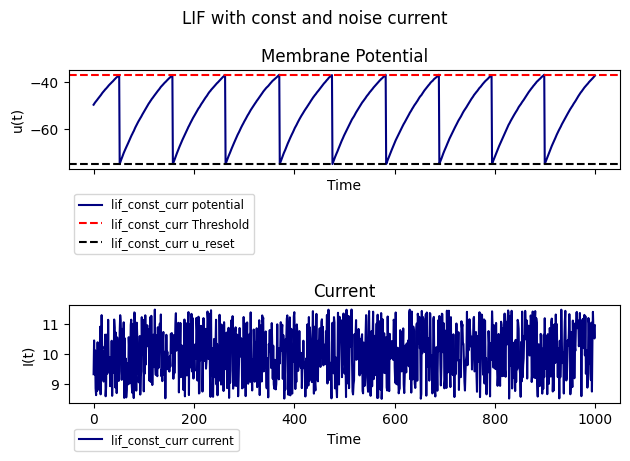

In [33]:
net1.plot_membrane_potential(title="LIF with const and noise current")

## 2.1.2 LIF model with step current and noise


In [34]:
net2 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.1)}))
net2.add_neuron_group(tag="lif_step_curr",
                      size=1,
                      behavior={
                            2: StepCurrent(value=10,
                                           t_start=25,
                                           t_end=75,
                                           noise_range=3),
                            3: LIF(R=5,
                                   tau=10,
                                   threshold=-37,
                                   u_rest=-67,
                                   u_reset=-75,
                                   ),
                            4: Recorder(variables=["u", "I"], tag="ng_step_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_step_event")
                        }
                      )
net2.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.1,)}
NeuronGroup['lif_step_curr', 'SimulateNeuronGroup', 'ng'](1){2:StepCurrent(value=10,t_start=25,t_end=75,noise_range=3,)3:LIF(R=5,tau=10,threshold=-37,u_rest=-67,u_reset=-75,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_step_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_step_event,)}
1000xBatch: 1/1 (100%) 377.787ms


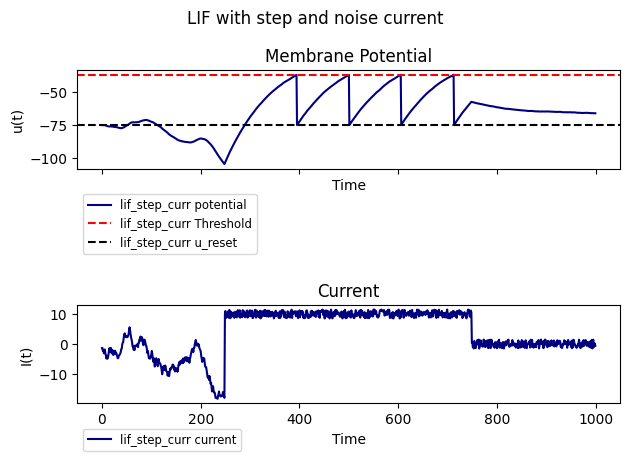

In [35]:
net2.plot_membrane_potential(title="LIF with step and noise current")

## 2.1.3 LIF model with sin current and noise

In [36]:
net3 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.1)}))
net3.add_neuron_group(tag="lif_sin_curr",
                        size=1,
                        behavior={
                            2: SinCurrent(amplitude=20,
                                          frequency=0.5,
                                          phase=2.0,
                                          offset=10,
                                          noise_range=10),
                            3: LIF(R=5,
                                   tau=10,
                                   threshold=-37,
                                   u_rest=-67,
                                   u_reset=-75,
                                   ),
                            4: Recorder(variables=["u", "I"], tag="ng_sin_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_sin_event")
                        }
                      )
net3.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.1,)}
NeuronGroup['lif_sin_curr', 'SimulateNeuronGroup', 'ng'](1){2:SinCurrent(amplitude=20,frequency=0.5,phase=2.0,offset=10,noise_range=10,)3:LIF(R=5,tau=10,threshold=-37,u_rest=-67,u_reset=-75,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_sin_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_sin_event,)}
1000xBatch: 1/1 (100%) 472.270ms


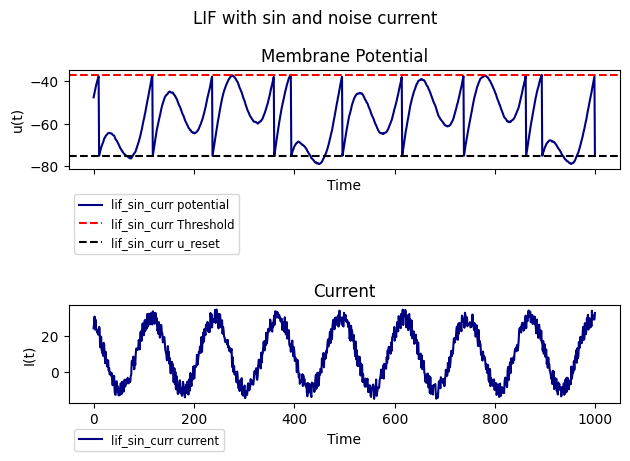

In [37]:
net3.plot_membrane_potential(title="LIF with sin and noise current")

## 2.1.4 LIF model with brownian noise current


In [38]:
from currents import NoisyCurrent
net4 = Simulation(net=Network(behavior={1: TimeResolution(dt=1)}))
net4.add_neuron_group(tag="lif_brownian_noise_curr",
                        size=1,
                        behavior={
                            2: NoisyCurrent(iterations=1001,
                                            mean=6,
                                            std=0.5,
                                            noise_type="brownian",
                                            seed=1),
                            3: LIF(R=5,
                                   tau=10,
                                   threshold=-37,
                                   u_rest=-67,
                                   u_reset=-75,
                                   ),
                            4: Recorder(variables=["u", "I"], tag="ng_brownian_noise_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_brownian_noise_event")
                        }
                      )
net4.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1,)}
NeuronGroup['lif_brownian_noise_curr', 'SimulateNeuronGroup', 'ng'](1){2:NoisyCurrent(iterations=1001,mean=6,std=0.5,noise_type=brownian,seed=1,)3:LIF(R=5,tau=10,threshold=-37,u_rest=-67,u_reset=-75,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_brownian_noise_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_brownian_noise_event,)}
1000xBatch: 1/1 (100%) 516.432ms


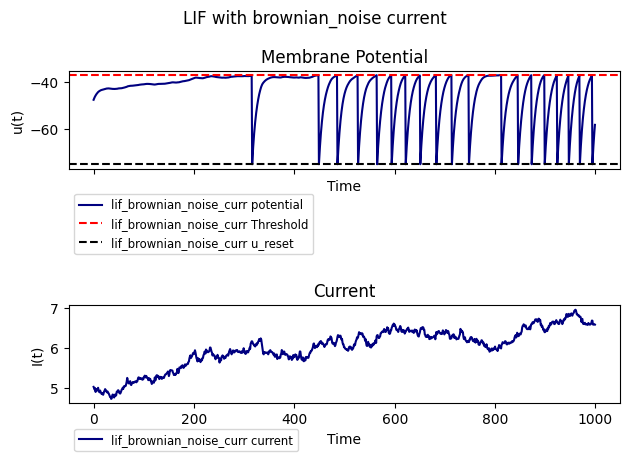

In [39]:
net4.plot_membrane_potential(title="LIF with brownian_noise current")

# 2.2 ELIF models with noise

## 2.2.1 ELIF model with constant current and noise

In [40]:
net1 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.5)}))
net1.add_neuron_group(tag="elif_const_curr",
                                size=1,
                                behavior={
                                    2: ConstantCurrent(value=14,
                                                       noise_range=3),
                                    3: ELIF(R=1.7,
                                        tau=10,
                                        threshold=-13,
                                        rh_threshold=-42,
                                        u_rest=-65,
                                        u_reset=-73,
                                        delta_T=0.1
                                        ),
                                    4: Recorder(variables=["u", "I"], tag="ng_const_rec"),
                                    5: EventRecorder(variables=['spike'], tag="ng_const_event")
                                    })
net1.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.5,)}
NeuronGroup['elif_const_curr', 'SimulateNeuronGroup', 'ng'](1){2:ConstantCurrent(value=14,noise_range=3,)3:ELIF(R=1.7,tau=10,threshold=-13,rh_threshold=-42,u_rest=-65,u_reset=-73,delta_T=0.1,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_event,)}
1000xBatch: 1/1 (100%) 382.335ms


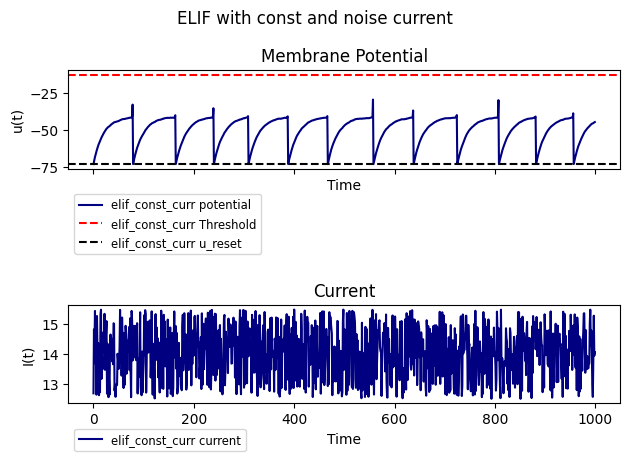

In [41]:
net1.plot_membrane_potential(title="ELIF with const and noise current")

# 2.2.2 ELIF model with step current and noise

In [42]:
net2 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.5)}))
net2.add_neuron_group(tag="elif_step_curr",
                                size=1,
                                behavior={
                                    2: StepCurrent(value=14,
                                                   t_start=50,
                                                   t_end=250,
                                                   noise_range=3),
                                    3: ELIF(R=1.7,
                                        tau=10,
                                        threshold=-13,
                                        rh_threshold=-42,
                                        u_rest=-65,
                                        u_reset=-73,
                                        delta_T=0.1
                                        ),
                                    4: Recorder(variables=["u", "I"], tag="ng_step_rec"),
                                    5: EventRecorder(variables=['spike'], tag="ng_step_event")
                                    })
net2.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.5,)}
NeuronGroup['elif_step_curr', 'SimulateNeuronGroup', 'ng'](1){2:StepCurrent(value=14,t_start=50,t_end=250,noise_range=3,)3:ELIF(R=1.7,tau=10,threshold=-13,rh_threshold=-42,u_rest=-65,u_reset=-73,delta_T=0.1,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_step_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_step_event,)}
1000xBatch: 1/1 (100%) 402.389ms


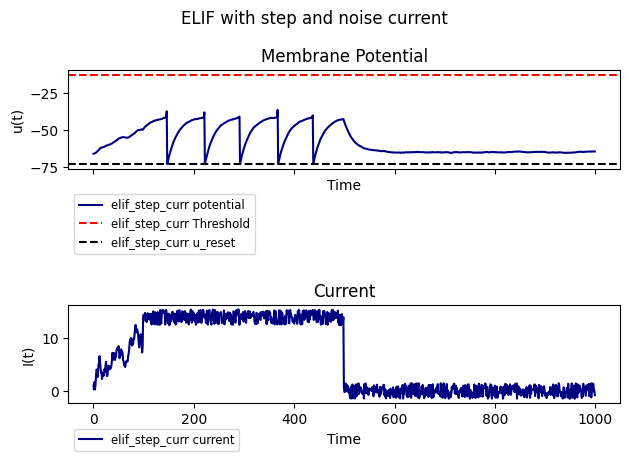

In [43]:
net2.plot_membrane_potential(title="ELIF with step and noise current")

# 2.2.3 ELIF model with sin current and noise

In [44]:
net3 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.1)}))
net3.add_neuron_group(tag="elif_sin_curr",
                        size=1,
                        behavior={
                            2: SinCurrent(amplitude=10,
                                          frequency=1,
                                          phase=0,
                                          offset=20,
                                          noise_range=10),
                            3: ELIF(R=1.7,
                                    tau=10,
                                    threshold=-13,
                                    rh_threshold=-42,
                                    u_rest=-65,
                                    u_reset=-73,
                                    delta_T=0.1
                                    ),
                            4: Recorder(variables=["u", "I"], tag="ng_sin_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_sin_event")
                        }
                      )
net3.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.1,)}
NeuronGroup['elif_sin_curr', 'SimulateNeuronGroup', 'ng'](1){2:SinCurrent(amplitude=10,frequency=1,phase=0,offset=20,noise_range=10,)3:ELIF(R=1.7,tau=10,threshold=-13,rh_threshold=-42,u_rest=-65,u_reset=-73,delta_T=0.1,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_sin_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_sin_event,)}
1000xBatch: 1/1 (100%) 476.324ms


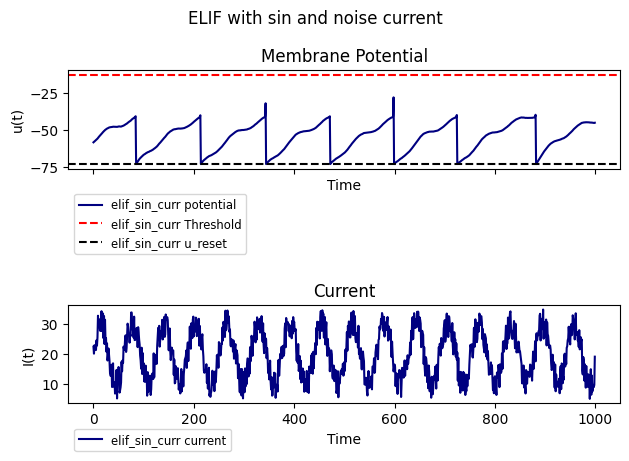

In [45]:
net3.plot_membrane_potential(title="ELIF with sin and noise current")

# 2.2.4 ELIF model with brownian noise current

In [46]:

net4 = Simulation(net=Network(behavior={1: TimeResolution(dt=1)}))
net4.add_neuron_group(tag="elif_brownian_noise_curr",
                        size=1,
                        behavior={
                            2: NoisyCurrent(iterations=1001,
                                            mean=6,
                                            std=0.5,
                                            noise_type="brownian",
                                            seed=1),
                            3: LIF(R=5,
                                   tau=10,
                                   threshold=-37,
                                   u_rest=-67,
                                   u_reset=-75,
                                   ),
                            4: Recorder(variables=["u", "I"], tag="ng_brownian_noise_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_brownian_noise_event")
                        }
                      )
net4.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1,)}
NeuronGroup['elif_brownian_noise_curr', 'SimulateNeuronGroup', 'ng'](1){2:NoisyCurrent(iterations=1001,mean=6,std=0.5,noise_type=brownian,seed=1,)3:LIF(R=5,tau=10,threshold=-37,u_rest=-67,u_reset=-75,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_brownian_noise_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_brownian_noise_event,)}
1000xBatch: 1/1 (100%) 517.157ms


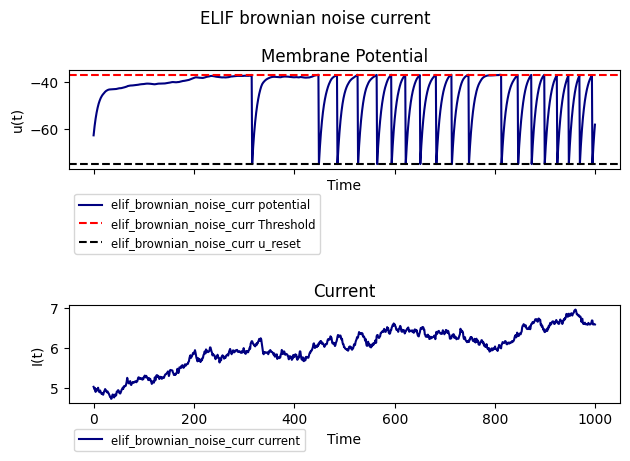

In [47]:
net4.plot_membrane_potential(title="ELIF brownian noise current")


# 2.3 AELIF models with noise

## 2.3.1 AELIF model with constant current and noise

In [48]:
net1 = Simulation(net=Network(behavior={1: TimeResolution(dt=1)}))
net1.add_neuron_group(tag="aelif_const_curr",
                        size=1,
                        behavior={
                            2: ConstantCurrent(value=30,
                                               noise_range=15),
                            3: AELIF(a=6.7,
                                     b=0.01,
                                     R=1.7,
                                     tau_m=10,
                                     tau_w=100,
                                     threshold=-30,
                                     rh_threshold=-50,
                                     u_rest=-65,
                                     u_reset=-70,
                                     delta_T=1
                                     ),
                            4: Recorder(variables=["u", "I"], tag="ng_const_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_const_event")
                        }
                      )
net1.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=1,)}
NeuronGroup['aelif_const_curr', 'SimulateNeuronGroup', 'ng'](1){2:ConstantCurrent(value=30,noise_range=15,)3:AELIF(a=6.7,b=0.01,R=1.7,tau_m=10,tau_w=100,threshold=-30,rh_threshold=-50,u_rest=-65,u_reset=-70,delta_T=1,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_event,)}
1000xBatch: 1/1 (100%) 454.606ms


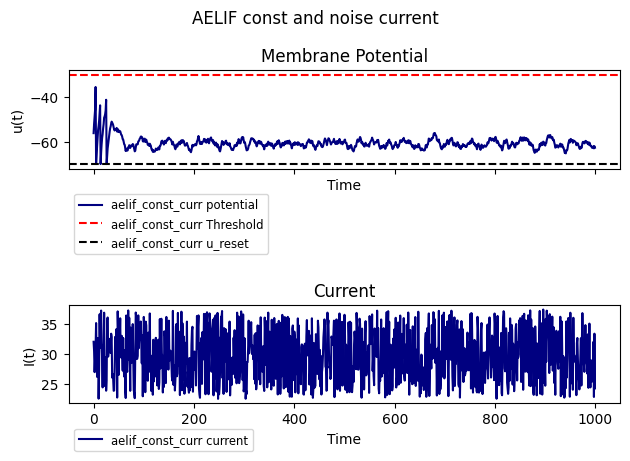

In [49]:
net1.plot_membrane_potential(title="AELIF const and noise current")

## 2.3.2 AELIF model with step current and noise

In [50]:
net2 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.5)}))
net2.add_neuron_group(tag="aelif_step_curr",
                        size=1,
                        behavior={
                            2: StepCurrent(value=30,
                                           t_start=50,
                                           noise_range=5),
                            3: AELIF(a=6.7,
                                     b=0.01,
                                     R=1.7,
                                     tau_m=10,
                                     tau_w=100,
                                     threshold=-30,
                                     rh_threshold=-50,
                                     u_rest=-65,
                                     u_reset=-70,
                                     delta_T=1
                                     ),
                            4: Recorder(variables=["u", "I", "w"], tag="ng_step_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_step_event")
                        }
                      )
net2.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.5,)}
NeuronGroup['aelif_step_curr', 'SimulateNeuronGroup', 'ng'](1){2:StepCurrent(value=30,t_start=50,noise_range=5,)3:AELIF(a=6.7,b=0.01,R=1.7,tau_m=10,tau_w=100,threshold=-30,rh_threshold=-50,u_rest=-65,u_reset=-70,delta_T=1,)4:Recorder(variables=['u', 'I', 'w'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_step_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_step_event,)}
1000xBatch: 1/1 (100%) 513.179ms


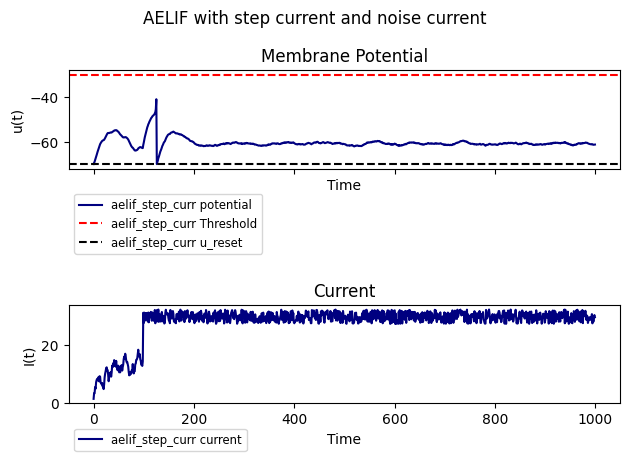

In [51]:
net2.plot_membrane_potential(title="AELIF with step current and noise current")

## 2.3.3 AELIF model with sin current and noise


In [52]:
net3 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.2)}))
net3.add_neuron_group(tag="aelif_sin_curr",
                        size=1,
                        behavior={
                            2: SinCurrent(amplitude=10,
                                          frequency=1,
                                          phase=0,
                                          offset=20,
                                          noise_range=5),
                            3: AELIF(a=0.5,
                                     b=7,
                                     R=1.7,
                                     tau_m=10,
                                     tau_w=100,
                                     threshold=-13,
                                     rh_threshold=-42,
                                     u_rest=-65,
                                     u_reset=-73,
                                     delta_T=0.1
                                     ),
                            4: Recorder(variables=["u", "I", "w"], tag="ng_sin_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_sin_event")
                        }
                      )
net3.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.2,)}
NeuronGroup['aelif_sin_curr', 'SimulateNeuronGroup', 'ng'](1){2:SinCurrent(amplitude=10,frequency=1,phase=0,offset=20,noise_range=5,)3:AELIF(a=0.5,b=7,R=1.7,tau_m=10,tau_w=100,threshold=-13,rh_threshold=-42,u_rest=-65,u_reset=-73,delta_T=0.1,)4:Recorder(variables=['u', 'I', 'w'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_sin_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_sin_event,)}
1000xBatch: 1/1 (100%) 591.602ms


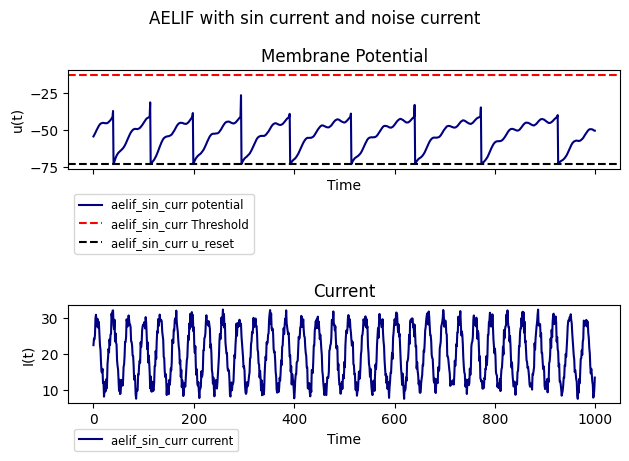

In [53]:
net3.plot_membrane_potential(title="AELIF with sin current and noise current")

## 2.3.4 AELIF model with brown noise


In [54]:
net4 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.5)}))
net4.add_neuron_group(tag="aelif_brown_noise_curr",
                        size=1,
                        behavior={
                            2: NoisyCurrent(iterations=1001,
                                            mean=65,
                                            std=5,
                                            noise_type="brownian",
                                            seed=6),
                            3: AELIF(a=6.7,
                                     b=0.01,
                                     R=1.7,
                                     tau_m=10,
                                     tau_w=100,
                                     threshold=-30,
                                     rh_threshold=-50,
                                     u_rest=-65,
                                     u_reset=-70,
                                     delta_T=1
                                     ),
                            4: Recorder(variables=["u", "I"], tag="ng_brown_noise_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_brown_noise_event")
                        }
                      )
net4.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.5,)}
NeuronGroup['aelif_brown_noise_curr', 'SimulateNeuronGroup', 'ng'](1){2:NoisyCurrent(iterations=1001,mean=65,std=5,noise_type=brownian,seed=6,)3:AELIF(a=6.7,b=0.01,R=1.7,tau_m=10,tau_w=100,threshold=-30,rh_threshold=-50,u_rest=-65,u_reset=-70,delta_T=1,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_brown_noise_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_brown_noise_event,)}
1000xBatch: 1/1 (100%) 619.664ms


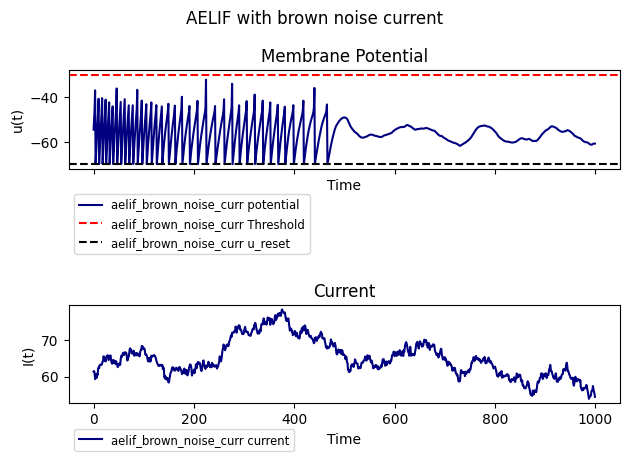

In [55]:
net4.plot_membrane_potential(title="AELIF with brown noise current")

# 3 F-I curve

## 3.1 F-I curve for constant current LIF models

In [56]:
net_noisy = Simulation(net=Network(behavior={1: TimeResolution(dt=0.1)}))
net_const = Simulation(net=Network(behavior={1: TimeResolution(dt=0.1)}))

for current in range(20):
    net_noisy.add_neuron_group(tag=f"lif_noisy_curr_{current}mA",
                                    size=1,
                                    behavior={
                                        2: ConstantCurrent(value=current,
                                                           noise_range=3),
                                        3: LIF(R=5,
                                               tau=10,
                                               threshold=-37,
                                               u_rest=-67,
                                               u_reset=-75,
                                               ),
                                        4: Recorder(variables=["u", "I"], tag="ng_noisy_rec"),
                                        5: EventRecorder(variables=['spike'], tag="ng_noisy_event")
                                        })
    net_const.add_neuron_group(tag=f"lif_const_curr_{current}mA",
                                    size=1,
                                    behavior={
                                        2: ConstantCurrent(value=current,
                                                           noise_range=3),
                                        3: LIF(R=5,
                                               tau=10,
                                               threshold=-37,
                                               u_rest=-67,
                                               u_reset=-75,
                                               ),
                                        4: Recorder(variables=["u", "I"], tag="ng_const_rec"),
                                        5: EventRecorder(variables=['spike'], tag="ng_const_event")
                                        })

net_noisy.simulate(iterations=1000)
net_const.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(20)|20 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.1,)}
NeuronGroup['lif_noisy_curr_0mA', 'SimulateNeuronGroup', 'ng'](1){2:ConstantCurrent(value=0,noise_range=3,)3:LIF(R=5,tau=10,threshold=-37,u_rest=-67,u_reset=-75,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_noisy_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_noisy_event,)}
NeuronGroup['lif_noisy_curr_1mA', 'SimulateNeuronGroup', 'ng'](1){2:ConstantCurrent(value=1,noise_range=3,)3:LIF(R=5,tau=10,threshold=-37,u_rest=-67,u_reset=-75,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_noisy_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_noisy_event,)}
NeuronGroup['lif_noisy_curr_2mA', 'SimulateNeuronGroup', 'ng'](1){2:ConstantCurrent(value=2,noise_range=3,)3:LIF(R=5,tau=10,threshold=-37,u_rest=-67,u_

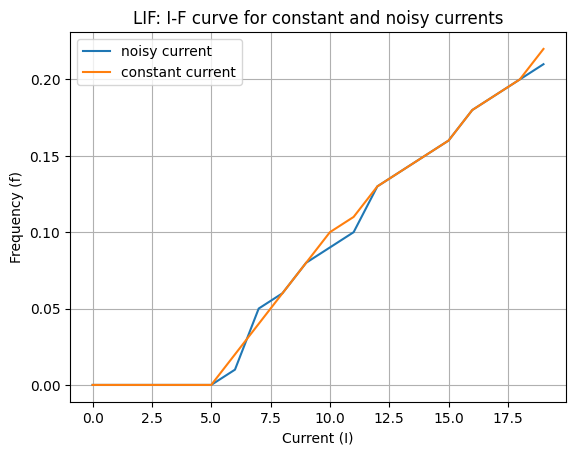

In [57]:
net_noisy.plot_IF_curve(label="noisy current", show=False)
net_const.plot_IF_curve(label="constant current", show=False)
plt.title("LIF: I-F curve for constant and noisy currents")
plt.show()

## 3.2 F-I curve for step current ELIF models

In [58]:
net_noisy = Simulation(net=Network(behavior={1: TimeResolution(dt=0.1)}))
net_const = Simulation(net=Network(behavior={1: TimeResolution(dt=0.1)}))
for current in range(20):
    net_noisy.add_neuron_group(tag=f"elif_noisy_curr{current}mA",
                        size=1,
                        behavior={
                            2: ConstantCurrent(value=current,
                                               noise_range=3),
                            3: ELIF(R=1.7,
                                    tau=10,
                                    threshold=-13,
                                    rh_threshold=-42,
                                    u_rest=-65,
                                    u_reset=-73,
                                    delta_T=0.1
                                    ),
                            4: Recorder(variables=["u", "I"], tag="ng_noisy_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_noisy_event")
                        }
                      )
    net_const.add_neuron_group(tag=f"elif_const_curr{current}mA",
                        size=1,
                        behavior={
                            2: ConstantCurrent(value=current),
                            3: ELIF(R=1.7,
                                    tau=10,
                                    threshold=-13,
                                    rh_threshold=-42,
                                    u_rest=-65,
                                    u_reset=-73,
                                    delta_T=0.1
                                    ),
                            4: Recorder(variables=["u", "I"], tag="ng_const_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_const_event")
                        }
                      )
net_noisy.simulate(iterations=1000)
net_const.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(20)|20 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.1,)}
NeuronGroup['elif_noisy_curr0mA', 'SimulateNeuronGroup', 'ng'](1){2:ConstantCurrent(value=0,noise_range=3,)3:ELIF(R=1.7,tau=10,threshold=-13,rh_threshold=-42,u_rest=-65,u_reset=-73,delta_T=0.1,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_noisy_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_noisy_event,)}
NeuronGroup['elif_noisy_curr1mA', 'SimulateNeuronGroup', 'ng'](1){2:ConstantCurrent(value=1,noise_range=3,)3:ELIF(R=1.7,tau=10,threshold=-13,rh_threshold=-42,u_rest=-65,u_reset=-73,delta_T=0.1,)4:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_noisy_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_noisy_event,)}
NeuronGroup['elif_noisy_curr2mA', 'SimulateNeuronGroup', 'ng'](1){2:ConstantCurrent(val

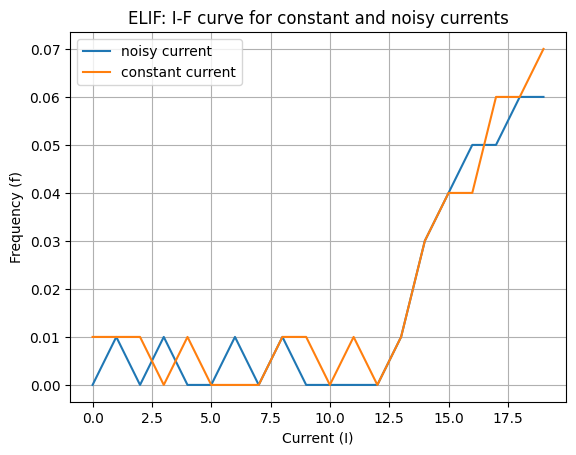

In [59]:
net_noisy.plot_IF_curve(label="noisy current", show=False)
net_const.plot_IF_curve(label="constant current", show=False)
plt.title("ELIF: I-F curve for constant and noisy currents")
plt.show()

## 3.3 F-I curve for step current AELIF models


In [60]:
net_noisy = Simulation(net=Network(behavior={1: TimeResolution(dt=0.1)}))
net_const = Simulation(net=Network(behavior={1: TimeResolution(dt=0.1)}))
for current in range(25,45):
    net_noisy.add_neuron_group(tag=f"aelif_noisy_curr{current}mA",
                        size=1,
                        behavior={
                            2: ConstantCurrent(value=current,
                                               noise_range=10),
                            3: AELIF(a=6.7,
                                     b=0.01,
                                     R=1.7,
                                     tau_m=10,
                                     tau_w=100,
                                     threshold=-30,
                                     rh_threshold=-50,
                                     u_rest=-65,
                                     u_reset=-70,
                                     delta_T=1
                                     ),
                            4: Recorder(variables=["u", "I", "w"], tag="ng_noisy_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_noisy_event")
                        }
                      )
    net_const.add_neuron_group(tag=f"aelif_const_curr{current}mA",
                        size=1,
                        behavior={
                            2: ConstantCurrent(value=current),
                            3: AELIF(a=6.7,
                                     b=0.01,
                                     R=1.7,
                                     tau_m=10,
                                     tau_w=100,
                                     threshold=-30,
                                     rh_threshold=-50,
                                     u_rest=-65,
                                     u_reset=-70,
                                     delta_T=1
                                     ),
                            4: Recorder(variables=["u", "I", "w"], tag="ng_const_rec"),
                            5: EventRecorder(variables=['spike'], tag="ng_const_event")
                        }
                      )
net_noisy.simulate(iterations=1000)
net_const.simulate(iterations=1000)


Network['Network_1', 'Network'](Neurons: tensor(20)|20 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.1,)}
NeuronGroup['aelif_noisy_curr25mA', 'SimulateNeuronGroup', 'ng'](1){2:ConstantCurrent(value=25,noise_range=10,)3:AELIF(a=6.7,b=0.01,R=1.7,tau_m=10,tau_w=100,threshold=-30,rh_threshold=-50,u_rest=-65,u_reset=-70,delta_T=1,)4:Recorder(variables=['u', 'I', 'w'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_noisy_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_noisy_event,)}
NeuronGroup['aelif_noisy_curr26mA', 'SimulateNeuronGroup', 'ng'](1){2:ConstantCurrent(value=26,noise_range=10,)3:AELIF(a=6.7,b=0.01,R=1.7,tau_m=10,tau_w=100,threshold=-30,rh_threshold=-50,u_rest=-65,u_reset=-70,delta_T=1,)4:Recorder(variables=['u', 'I', 'w'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_noisy_rec,)5:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_noisy_event,)}
NeuronGroup['aelif_no

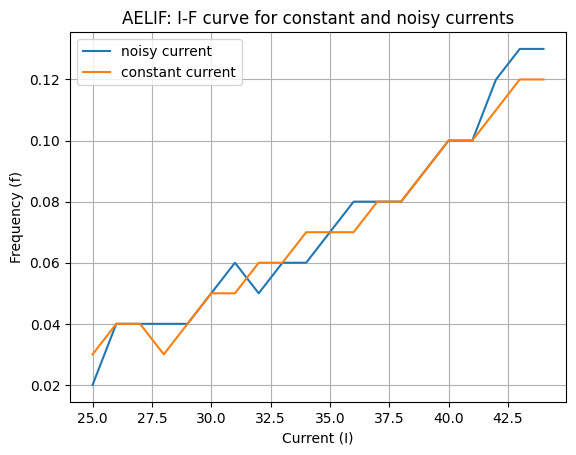

In [61]:
net_noisy.plot_IF_curve(label="noisy current", show=False)
net_const.plot_IF_curve(label="constant current", show=False)
plt.title("AELIF: I-F curve for constant and noisy currents")
plt.show()

# 4.Refactory period

## 4.1 Refactory period for LIF model with constant current

### a) Refractory as a parameter in Model

In [62]:
net1 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.1)}))
net1.add_neuron_group(tag="lif_const_curr",
                                size=1,
                                behavior={
                                    2: ConstantCurrent(value=10),
                                    4: LIF(R=5,
                                           tau=10,
                                           threshold=-37,
                                           u_rest=-67,
                                           u_reset=-75,
                                           refractory_T=20
                                           ),
                                    5: Recorder(variables=["u", "I"], tag="ng_const_rec"),
                                    6: EventRecorder(variables=['spike'], tag="ng_const_event")
                                    })
net1.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.1,)}
NeuronGroup['lif_const_curr', 'SimulateNeuronGroup', 'ng'](1){2:ConstantCurrent(value=10,)4:LIF(R=5,tau=10,threshold=-37,u_rest=-67,u_reset=-75,refractory_T=20,)5:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_rec,)6:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_event,)}
1000xBatch: 1/1 (100%) 368.390ms


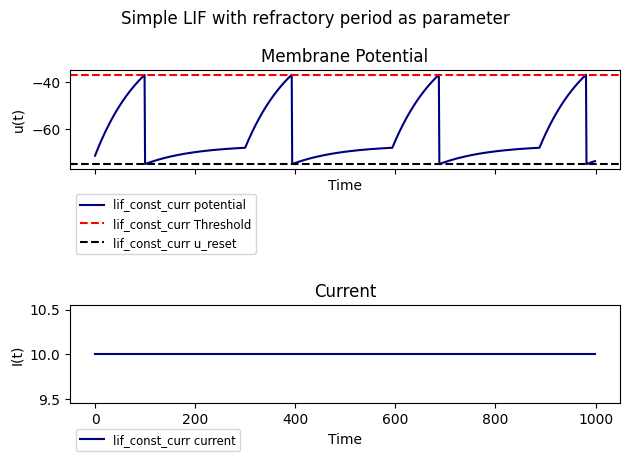

In [63]:
net1.plot_membrane_potential(title="Simple LIF with refractory period as parameter", model_idx=4, record_idx=5)

### b) Refractory as a behavior NeuronGroup


In [64]:
net1 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.1)}))
net1.add_neuron_group(tag="lif_const_curr",
                                size=1,
                                behavior={
                                    2: ConstantCurrent(value=10),
                                    3: RefractoryPeriod(refractory_T=20),
                                    4: LIF(R=5,
                                           tau=10,
                                           threshold=-37,
                                           u_rest=-67,
                                           u_reset=-75,
                                           ),
                                    5: Recorder(variables=["u", "I"], tag="ng_const_rec"),
                                    6: EventRecorder(variables=['spike'], tag="ng_const_event")
                                    })
net1.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.1,)}
NeuronGroup['lif_const_curr', 'SimulateNeuronGroup', 'ng'](1){2:ConstantCurrent(value=10,)3:RefractoryPeriod(refractory_T=20,)4:LIF(R=5,tau=10,threshold=-37,u_rest=-67,u_reset=-75,)5:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_rec,)6:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_event,)}
1000xBatch: 1/1 (100%) 416.173ms


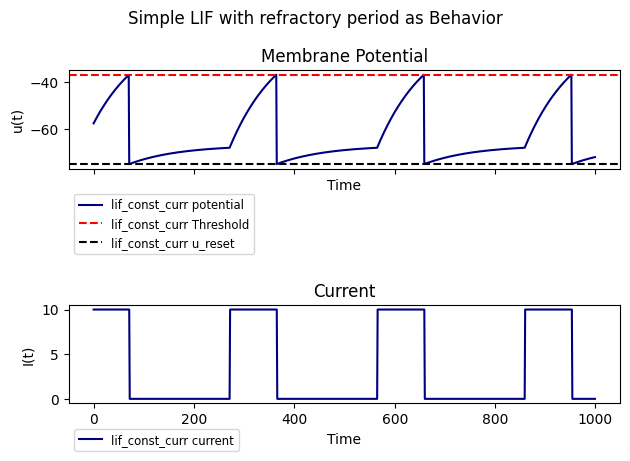

In [65]:
net1.plot_membrane_potential(title="Simple LIF with refractory period as Behavior", model_idx=4, record_idx=5)

## 4.2 Refactory period for ELIF model with constant current


### a) Refractory as a parameter in Model

In [66]:
net2 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.5)}))
net2.add_neuron_group(tag="elif_const_curr",
                                size=1,
                                behavior={
                                    2: ConstantCurrent(value=13.8),
                                    4: ELIF(R=1.7,
                                            tau=10,
                                            threshold=-13,
                                            rh_threshold=-42,
                                            u_rest=-65,
                                            u_reset=-73,
                                            delta_T=0.1,
                                            refractory_T=50,
                                            ),
                                    5: Recorder(variables=["u", "I"], tag="ng_const_rec"),
                                    6: EventRecorder(variables=['spike'], tag="ng_const_event")
                                    })
net2.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.5,)}
NeuronGroup['elif_const_curr', 'SimulateNeuronGroup', 'ng'](1){2:ConstantCurrent(value=13.8,)4:ELIF(R=1.7,tau=10,threshold=-13,rh_threshold=-42,u_rest=-65,u_reset=-73,delta_T=0.1,refractory_T=50,)5:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_rec,)6:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_event,)}
1000xBatch: 1/1 (100%) 441.719ms


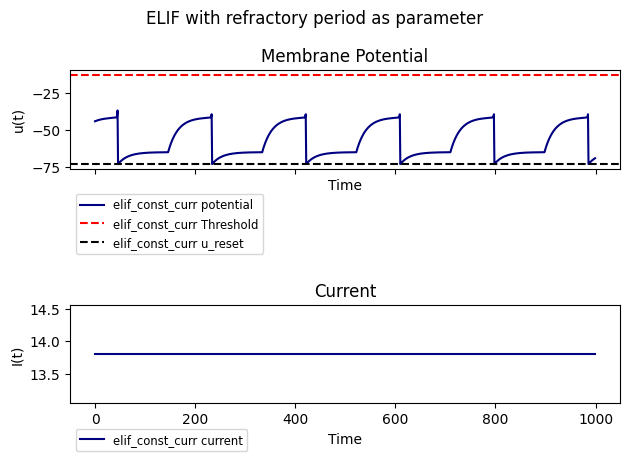

In [67]:
net2.plot_membrane_potential(title="ELIF with refractory period as parameter", model_idx=4, record_idx=5)

### b) Refractory as a behavior NeuronGroup

In [68]:
net2 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.5)}))
net2.add_neuron_group(tag="elif_const_curr",
                                size=1,
                                behavior={
                                    2: ConstantCurrent(value=13.8),
                                    3: RefractoryPeriod(refractory_T=50),
                                    4: ELIF(R=1.7,
                                            tau=10,
                                            threshold=-13,
                                            rh_threshold=-42,
                                            u_rest=-65,
                                            u_reset=-73,
                                            delta_T=0.1,
                                            ),
                                    5: Recorder(variables=["u", "I"], tag="ng_const_rec"),
                                    6: EventRecorder(variables=['spike'], tag="ng_const_event")
                                    })
net2.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.5,)}
NeuronGroup['elif_const_curr', 'SimulateNeuronGroup', 'ng'](1){2:ConstantCurrent(value=13.8,)3:RefractoryPeriod(refractory_T=50,)4:ELIF(R=1.7,tau=10,threshold=-13,rh_threshold=-42,u_rest=-65,u_reset=-73,delta_T=0.1,)5:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_rec,)6:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_event,)}
1000xBatch: 1/1 (100%) 438.706ms


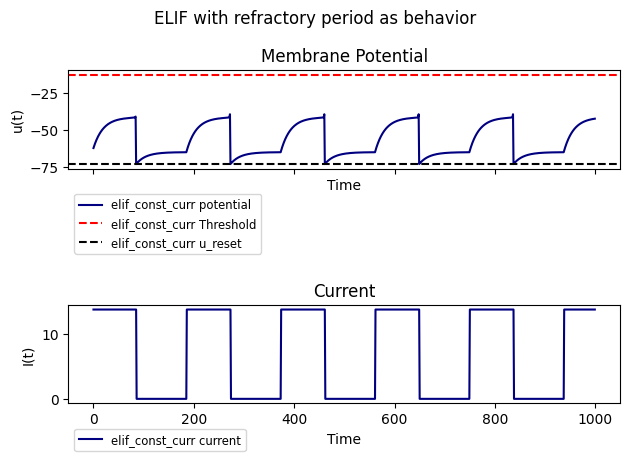

In [69]:
net2.plot_membrane_potential(title="ELIF with refractory period as behavior", model_idx=4, record_idx=5)

## 4.3 Refactory period for AELIF model with constant current


### a) Refractory as a parameter in Model

In [70]:
net3 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.5)}))
net3.add_neuron_group(tag="elif_const_curr",
                                size=1,
                                behavior={
                                    2: ConstantCurrent(value=30),
                                    4: AELIF(a=6.7,
                                             b=0.01,
                                             R=1.7,
                                             tau_m=10,
                                             tau_w=100,
                                             threshold=-30,
                                             rh_threshold=-50,
                                             u_rest=-65,
                                             u_reset=-70,
                                             delta_T=1,
                                             refractory_T=50
                                             ),
                                    5: Recorder(variables=["u", "I"], tag="ng_const_rec"),
                                    6: EventRecorder(variables=['spike'], tag="ng_const_event")
                                    })
net3.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.5,)}
NeuronGroup['elif_const_curr', 'SimulateNeuronGroup', 'ng'](1){2:ConstantCurrent(value=30,)4:AELIF(a=6.7,b=0.01,R=1.7,tau_m=10,tau_w=100,threshold=-30,rh_threshold=-50,u_rest=-65,u_reset=-70,delta_T=1,refractory_T=50,)5:Recorder(variables=['u', 'I'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_rec,)6:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_event,)}
1000xBatch: 1/1 (100%) 470.165ms


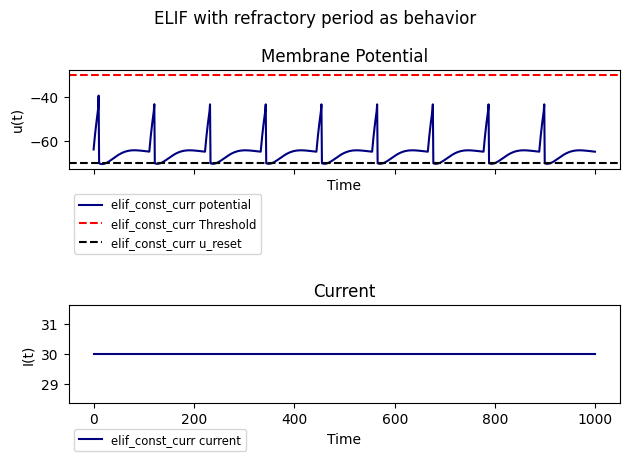

In [71]:
net3.plot_membrane_potential(title="ELIF with refractory period as behavior", model_idx=4, record_idx=5)

### b) Refractory as a behavior NeuronGroup

In [72]:
net3 = Simulation(net=Network(behavior={1: TimeResolution(dt=0.5)}))
net3.add_neuron_group(tag="aelif_const_curr",
                                size=1,
                                behavior={
                                    2: ConstantCurrent(value=30),
                                    3: RefractoryPeriod(refractory_T=0),
                                    4: AELIF(a=6.7,
                                             b=0.01,
                                             R=1.7,
                                             tau_m=10,
                                             tau_w=100,
                                             threshold=-30,
                                             rh_threshold=-50,
                                             u_rest=-65,
                                             u_reset=-70,
                                             delta_T=1,
                                             ),
                                    5: Recorder(variables=["u", "I", "w"], tag="ng_const_rec"),
                                    6: EventRecorder(variables=['spike'], tag="ng_const_event")
                                    })
net3.simulate(iterations=1000)

Network['Network_1', 'Network'](Neurons: tensor(1)|1 groups, Synapses: tensor(0.)|0 groups){1:TimeResolution(dt=0.5,)}
NeuronGroup['aelif_const_curr', 'SimulateNeuronGroup', 'ng'](1){2:ConstantCurrent(value=30,)3:RefractoryPeriod(refractory_T=0,)4:AELIF(a=6.7,b=0.01,R=1.7,tau_m=10,tau_w=100,threshold=-30,rh_threshold=-50,u_rest=-65,u_reset=-70,delta_T=1,)5:Recorder(variables=['u', 'I', 'w'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_rec,)6:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=ng_const_event,)}
1000xBatch: 1/1 (100%) 561.560ms


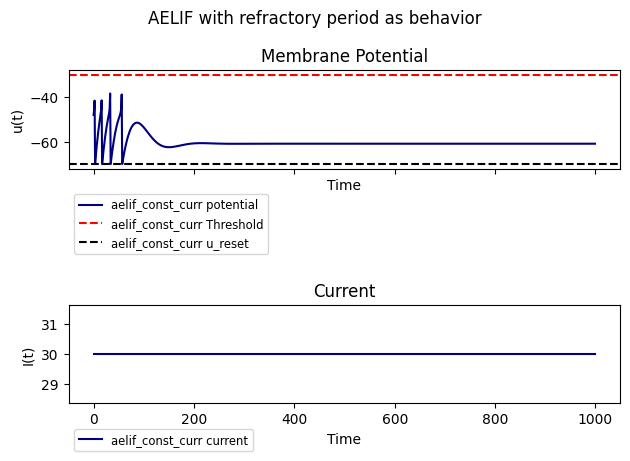

In [73]:
net3.plot_membrane_potential(title="AELIF with refractory period as behavior", model_idx=4, record_idx=5, save=True)

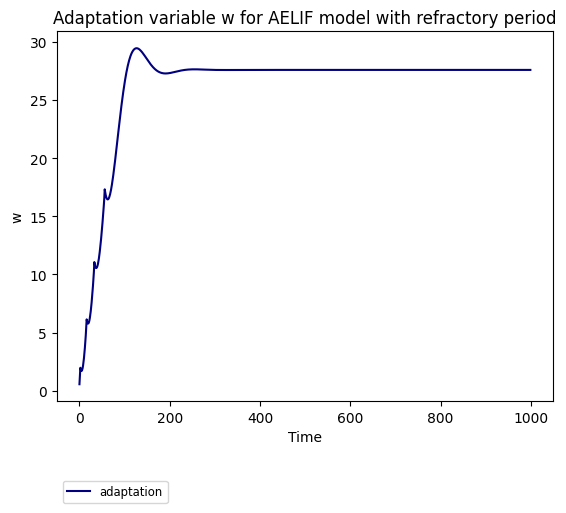

In [74]:
net3.plot_w("Adaptation variable w for AELIF model with refractory period", record_idx=5)